# ANN - IRIS DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier

In [3]:
df=pd.read_csv('C:/Users/Dell/Downloads/iris.csv')
print(df.shape)
df.describe().transpose()

(150, 5)


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [4]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [5]:
y=df['species']
print(y)
df=df.drop(['species'],axis=1)
x=df
print(x)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


In [7]:
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[0.44444444 0.41666667 0.53448276 0.58333333]
 [0.41666667 0.25       0.5        0.45833333]
 [0.69444444 0.41666667 0.75862069 0.83333333]
 [0.11111111 0.5        0.03448276 0.04166667]
 [0.72222222 0.45833333 0.68965517 0.91666667]
 [0.19444444 0.625      0.0862069  0.20833333]
 [0.30555556 0.70833333 0.06896552 0.04166667]
 [0.19444444 0.         0.4137931  0.375     ]
 [0.61111111 0.41666667 0.75862069 0.70833333]
 [0.66666667 0.54166667 0.79310345 1.        ]
 [0.47222222 0.08333333 0.67241379 0.58333333]
 [0.66666667 0.20833333 0.81034483 0.70833333]
 [0.36111111 0.20833333 0.48275862 0.41666667]
 [0.94444444 0.41666667 0.86206897 0.91666667]
 [0.55555556 0.54166667 0.62068966 0.625     ]
 [0.33333333 0.16666667 0.46551724 0.41666667]
 [0.55555556 0.29166667 0.65517241 0.70833333]
 [0.55555556 0.33333333 0.68965517 0.58333333]
 [0.16666667 0.20833333 0.5862069  0.66666667]
 [0.55555556 0.20833333 0.67241379 0.75      ]
 [0.75       0.5        0.62068966 0.54166667]
 [0.61111111 

In [8]:
classifier=MLPClassifier(hidden_layer_sizes=(5,5),activation='relu',solver='lbfgs',max_iter=200)
classifier.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), solver='lbfgs')

In [9]:
x_pred=classifier.predict(x_train)
y_pred=classifier.predict(x_test)
print(y_test.values)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor']
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [10]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=classifier.classes_)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


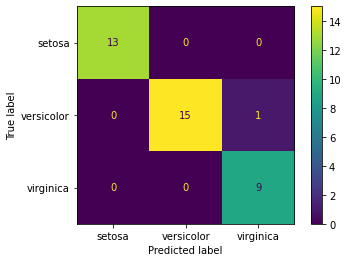

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [12]:
training_score=classifier.score(x_train,y_train)
test_score=classifier.score(x_test,y_test)
print(training_score)
print(test_score)

1.0
0.9736842105263158


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9736842105263158


In [14]:
classifier.coefs_

[array([[-3.36200513,  0.37563261,  0.45796008, -1.79833652, -2.46344236],
        [ 0.9883403 , -0.33638031, -0.01923872,  5.89980306,  2.35597305],
        [ 5.23984893, -0.69360081, -0.39102078, -5.15782382, -3.83754467],
        [ 1.59954923,  0.74330239, -0.78254327, -4.79674747, -2.51439794]]),
 array([[-0.47977192,  7.14892295, -0.49727117, -3.50657059, -0.87148808],
        [ 0.56181766,  0.69332889, -0.01058129, -0.60002097, -0.46885026],
        [-0.35422156, -0.24835969, -0.06830477,  0.64371201,  0.12034857],
        [ 0.57865505, -0.49926381,  0.482894  ,  4.06236089, -0.03945372],
        [-0.52732069, -0.90737309, -0.28789648,  3.23452188, -0.49819752]]),
 array([[ 0.1141435 ,  0.3046888 , -0.21420069],
        [-6.6507699 ,  2.3170641 ,  4.70860829],
        [-0.32538604,  0.57140104, -0.29873343],
        [ 6.42739799,  3.54789104, -9.66897981],
        [ 0.02748545, -0.18949917, -0.69198291]])]

In [15]:
classifier.intercepts_

[array([-2.14500814, -0.42714075, -0.45324882,  5.47337106, -0.12794551]),
 array([-0.16535429,  9.24962369, -2.08503838,  4.95446057, -1.84823682]),
 array([-6.64217977,  3.58631277,  4.22932918])]